In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.preprocessing import MinMaxScaler
import base64
import copy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [0]:
def splitTrainTest(data,percent):
    total=len(data)
    trainTotal=int(total*percent*0.01)
    testTotal=total-trainTotal
    return (data[0:trainTotal],data[trainTotal:total])

In [32]:
data=pd.read_csv("GoogleStocks.csv").values
av=(data[:,4:]).astype(np.float)
data[:,5]=av.mean(axis=1)
data=data[:,[3,2,5]]
print(data.shape)
# print(data)

(756, 3)


In [49]:
# 0 is open, 1 is volume, 2 is avg
sc = MinMaxScaler(feature_range = (0, 1))
scaledTrain = sc.fit_transform(data)

scaledTrain,scaledTest=splitTrainTest(scaledTrain,80)
print(scaledTrain.shape,scaledTest.shape)

(604, 3) (152, 3)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [34]:
X_train = []
y_train = []
for i in range(60, scaledTrain.shape[0]):
    X_train.append(scaledTrain[i-60:i, [1,2]])
    y_train.append(scaledTrain[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape)
print(y_train.shape)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
print(X_train.shape)

(544, 60, 2)
(544,)
(544, 60, 2)


In [35]:
# Initialising the RNN
regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 2)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
544/544 [==============================] - 6s 12ms/step - loss: 0.0999
Epoch 2/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0187
Epoch 3/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0119
Epoch 4/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0096
Epoch 5/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0100
Epoch 6/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0085
Epoch 7/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0079
Epoch 8/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0084
Epoch 9/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0079
Epoch 10/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0083
Epoch 11/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0083
Epoch 12/100
544/544 [==============================] - 3s 5ms/step - loss: 0.0072
Epoch 13/100

In [52]:
dataset_total=np.concatenate((scaledTrain,scaledTest),axis=0)
print(len(dataset_total),len(scaledTrain),len(scaledTest))

inputs = dataset_total[len(dataset_total) - len(scaledTest) - 60:] #getting input of each previous financial days
print(inputs.shape)
X_test = []
y_test = scaledTest[:,0]
for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i, [1,2]])
#     y_test.append(inputs[i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 2))
predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price.shape,len(y_test))
for a,b in zip(y_test,predicted_stock_price):
  print(a,b)
# predicted_stock_price = sc.inverse_transform(predicted_stock_price)


756 604 152
(212, 3)
(152, 1) 152
0.22891666666666666 [0.18766238]
0.21666666666666679 [0.19525978]
0.2255666666666667 [0.20850652]
0.2427999999999999 [0.22087047]
0.22316666666666674 [0.22890812]
0.20666666666666678 [0.23238814]
0.22049999999999992 [0.23112021]
0.21310000000000007 [0.22719568]
0.19474999999999998 [0.22267848]
0.18133333333333335 [0.21901706]
0.18441666666666667 [0.2146742]
0.18369999999999997 [0.20851561]
0.18793333333333329 [0.2013228]
0.19276666666666653 [0.19398388]
0.17785000000000006 [0.18784913]
0.18110000000000004 [0.18324307]
0.17999999999999994 [0.17946663]
0.18051666666666666 [0.1762341]
0.17504999999999993 [0.17394687]
0.17208333333333337 [0.17235444]
0.1755500000000001 [0.17106074]
0.18406666666666682 [0.17032298]
0.17808333333333337 [0.17001358]
0.17416666666666658 [0.16959517]
0.18623333333333347 [0.16888233]
0.19265 [0.16827849]
0.18166666666666664 [0.16822714]
0.16943333333333332 [0.16882962]
0.16333333333333333 [0.1690909]
0.16903333333333337 [0.16809

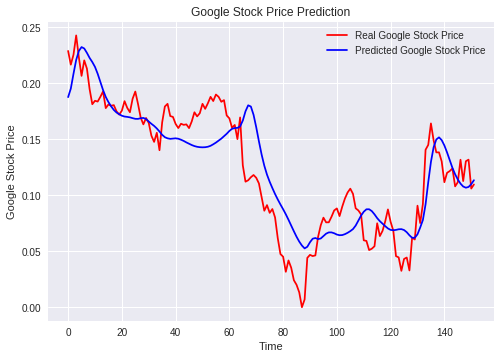

In [47]:

# Visualising the results
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()